# Market basket analysis

# Algoritmos apriori

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Creando sries aleatorias que representan las adquisiciones por los usuarios
np.random.seed(1)

uvas = np.random.randint(0,2,100)
naranjas= np.random.randint(0,2,100)
manzanas = np.random.randint(0,2,100)
mangos= np.random.randint(0,2,100)
platanos = np.random.randint(0,2,100)

In [3]:
uvas

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [4]:
# Creando el DF
compras=pd.DataFrame({"GRAPES":uvas,
                      "ORANGES":naranjas,
                      "APPLES":manzanas,
                      "MANGOES":mangos,
                      "BANANAS":platanos})
compras.head()

,GRAPES,ORANGES,APPLES,MANGOES,BANANAS
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,0,0,0,0,1
4,1,0,1,0,1


Las reglas de asociación permiten encontrar patrones comunes dentro de una base de datos:


                      {Antecedentes}----->{Consecuentes}

  * Soporte : Support
  * Confianza: Confidence
  * Asociación: Lift

## Support

In [6]:
# El soporte es el cálculo de la probabilidad de la aparición de cierto artículo:

len(compras)   ,  compras.GRAPES.sum()

(100, 55)

In [10]:
compras.GRAPES.value_counts()

1    55
0    45
Name: GRAPES, dtype: int64

In [11]:
compras.GRAPES.sum()/len(compras) 

0.55

In [21]:
# Definimos la fórmula de support
def support (dataframe,columna):
  return dataframe[columna].sum()/len(dataframe) 

In [22]:
support(compras,"GRAPES")

0.55

In [25]:
for col in list(compras.columns):
  print("Soporte de", col,"\t:",support(compras,col))

Soporte de GRAPES 	: 0.55
Soporte de ORANGES 	: 0.46
Soporte de APPLES 	: 0.53
Soporte de MANGOES 	: 0.44
Soporte de BANANAS 	: 0.46


## Confidence

$
\huge
conf_{(A->B)}=\frac{Transacciones\  incluyendo\  A\  y\  B}
{Transacciones\  solo\  incluyendo\  A}$

In [29]:
# Calcular el confidence de cuando se compra (a)uvas y (b)naranjas

len(compras[(compras.GRAPES==1) & (compras.ORANGES==1)])

25

In [30]:
len(compras[(compras.GRAPES==1)])

55

In [32]:
conf_ab=len(compras[(compras.GRAPES==1) & (compras.ORANGES==1)])/len(compras[(compras.GRAPES==1)])
conf_ab

0.45454545454545453

In [33]:
# Calcular el confidence de cuando se compra (a) uvas y naranjas, y que ademas se compre (b)mangos

x=len(compras[(compras.GRAPES==1) & (compras.ORANGES==1) & (compras.MANGOES==1)])
x

11

In [34]:
y=len(compras[(compras.GRAPES==1) & (compras.ORANGES==1)])
y

25

In [35]:
conf_xy=x/y
conf_xy

0.44

In [36]:
compras.columns

Index(['GRAPES', 'ORANGES', 'APPLES', 'MANGOES', 'BANANAS'], dtype='object')

## Lift

Incremento de la venta de A si la persona adquiere B


$
\huge
lift_{(A->B)}=\frac{Confidence_{(A->B)}}{Support_B}
$

In [38]:
# (a) Uvas
# (b) Mangos

soporte_b=support(compras,"MANGOES")


In [40]:
numerador=len(compras[(compras.GRAPES==1) & (compras.MANGOES==1)])

In [42]:
denominador=len(compras[(compras.GRAPES==1)])

In [44]:
conf_nd=numerador/denominador
conf_nd

0.45454545454545453

In [45]:
lift=conf_nd/soporte_b
lift

1.0330578512396693

Como **interpretar** el Lift:



1.   El resultado es **menor a 1**, la relación es negativa
2.   El resultado es **igual a 1**, no existe ningún tipo de relación
3.   El resultado es **mayor a 1**, la relación es positiva, y es probable que A y B se ccompren juntos.



# Ejemplo real.

In [46]:
! pip install mlxtend

In [49]:
url="https://raw.githubusercontent.com/edavgaun/Python_Intermedio/master/Datasets/BreadBasket_DMS.csv"

df=pd.read_csv(url)
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [53]:
print("Clientes atendidos:",df.Transaction.max())

Clientes atendidos: 9684


In [55]:
len(df.Item), len(df)

(21293, 21293)

In [59]:
print("Total de artículos disponibles en la tienda:",len(df.Item.unique()))

Total de artículos disponibles en la tienda: 95


In [64]:
# Determinando los artículos que más se venden:
top10=df.Item.value_counts().head(10)
top10

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

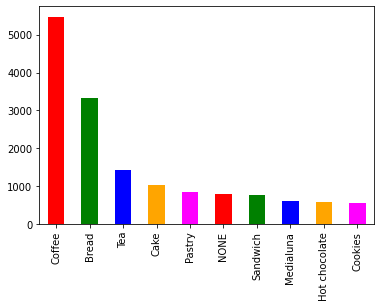

In [71]:
top10.plot(kind="bar", color=["red","green","blue","orange","magenta"])
plt.show()

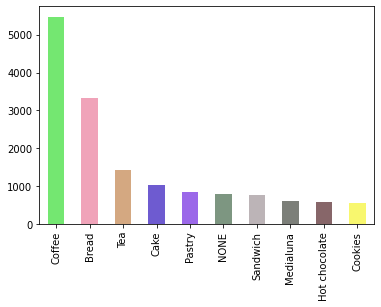

In [75]:
# Usando formato RGB+transparencia: (R,G,B,T)
np.random.seed(5)

# Creando colores usando RGB, numpy y list comprehension
colores=[(np.random.rand(),np.random.rand(),np.random.rand(),0.7) for n in range(10)]

top10.plot(kind="bar", color=colores)
plt.show()

In [76]:
# Creando variables dummy

dummies=pd.get_dummies(df["Item"])
dummies

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,NONE,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
dummies.drop("NONE", axis=1, inplace=True)

In [85]:
# Concatenando el dataframe original con el de variables dummy

df_concat=pd.concat([df,dummies], axis=1)

In [86]:
df_concat

,Date,Time,Transaction,Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,2016-10-30,09:58:11,1,Bread,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21289,2017-04-09,14:32:58,9682,Tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21290,2017-04-09,14:57:06,9683,Coffee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21291,2017-04-09,14:57:06,9683,Pastry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
basket=df_concat.groupby("Transaction").sum()

In [98]:
# applymap ejecutará una función lambda a todas las filas y columnas del DF

basket_lista=basket.applymap(lambda x:0 if x<1 else 1)
basket_lista.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
# Crear un objeto apriori desde la libreria mlxtent
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml


frequent_items=apriori(basket_lista, min_support=0.001, use_colnames=True)

In [102]:
# Creando las reglas de asociación:

rules=association_rules(frequent_items, metric="lift", min_threshold=1)

In [103]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Brownie),0.036093,0.039765,0.002833,0.078488,1.973807,0.001398,1.042022
1,(Brownie),(Alfajores),0.039765,0.036093,0.002833,0.071240,1.973807,0.001398,1.037843
2,(Alfajores),(Cake),0.036093,0.103137,0.004092,0.113372,1.099236,0.000369,1.011544
3,(Cake),(Alfajores),0.103137,0.036093,0.004092,0.039674,1.099236,0.000369,1.003730
4,(Coffee),(Alfajores),0.475081,0.036093,0.019515,0.041078,1.138116,0.002368,1.005199
...,...,...,...,...,...,...,...,...,...
1013,"(Coffee, Cake)","(Sandwich, Tea)",0.054349,0.014269,0.001049,0.019305,1.352913,0.000274,1.005135
1014,(Sandwich),"(Coffee, Tea, Cake)",0.071346,0.009967,0.001049,0.014706,1.475387,0.000338,1.004809
1015,(Tea),"(Sandwich, Cake, Coffee)",0.141643,0.004617,0.001049,0.007407,1.604545,0.000395,1.002812
1016,(Cake),"(Sandwich, Tea, Coffee)",0.103137,0.005351,0.001049,0.010173,1.901143,0.000497,1.004872


In [107]:
reglas_ordenado=rules.sort_values("confidence", ascending=False)
reglas_ordenado.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
764,"(Salad, Extra Salami or Feta)",(Coffee),0.001679,0.475081,0.001469,0.875000,1.841790,0.000671,4.199349
910,"(Pastry, Toast)",(Coffee),0.001574,0.475081,0.001364,0.866667,1.824249,0.000616,3.936890
775,"(Sandwich, Hearty & Seasonal)",(Coffee),0.001469,0.475081,0.001259,0.857143,1.804202,0.000561,3.674431
653,"(Vegan mincepie, Cake)",(Coffee),0.001259,0.475081,0.001049,0.833333,1.754086,0.000451,3.149512
912,"(Salad, Sandwich)",(Coffee),0.001889,0.475081,0.001574,0.833333,1.754086,0.000677,3.149512
121,(Extra Salami or Feta),(Coffee),0.003987,0.475081,0.003253,0.815789,1.717158,0.001358,2.849559
135,(Keeping It Local),(Coffee),0.006610,0.475081,0.005351,0.809524,1.703969,0.002211,2.755823
751,"(Scone, Cookies)",(Coffee),0.001993,0.475081,0.001574,0.789474,1.661765,0.000627,2.493364
838,"(Pastry, Juice)",(Coffee),0.002308,0.475081,0.001784,0.772727,1.626516,0.000687,2.309642
602,"(Salad, Cake)",(Coffee),0.001364,0.475081,0.001049,0.769231,1.619156,0.000401,2.274648


In [112]:
type(reglas_ordenado.iloc[0,1]) , reglas_ordenado.iloc[0,1]

(frozenset, frozenset({'Coffee'}))

In [113]:
filtro=reglas_ordenado.iloc[0,1]

In [115]:
reglas_ordenado[reglas_ordenado.consequents!=filtro].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
402,"(Jammie Dodgers, Cake)",(Bread),0.003043,0.324940,0.001574,0.517241,1.591807,0.000585,1.398339
40,(Eggs),(Bread),0.002938,0.324940,0.001469,0.500000,1.538747,0.000514,1.350121
959,"(Coke, Juice)",(Sandwich),0.002203,0.071346,0.001049,0.476190,6.674370,0.000892,1.772885
763,"(Coffee, Extra Salami or Feta)",(Salad),0.003253,0.010387,0.001469,0.451613,43.478006,0.001435,1.804588
368,"(Alfajores, Cookies)",(Juice),0.002413,0.038296,0.001049,0.434783,11.353186,0.000957,1.701476
711,"(Soup, Cake)",(Tea),0.004407,0.141643,0.001889,0.428571,3.025714,0.001264,1.502125
189,(Extra Salami or Feta),(Salad),0.003987,0.010387,0.001679,0.421053,40.535885,0.001637,1.709331
492,"(Jammie Dodgers, Tea)",(Bread),0.002518,0.324940,0.001049,0.416667,1.282289,0.000231,1.157246
486,"(Scone, Hot chocolate)",(Bread),0.002938,0.324940,0.001154,0.392857,1.209016,0.000200,1.111864
705,"(Scone, Cake)",(Tea),0.004721,0.141643,0.001784,0.377778,2.667111,0.001115,1.379502
